## 2-3. データの全体概要をチェックする

In [1]:
import pandas as pd
import numpy as np

# 可視化
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

sns.set(context="notebook",
        font="Hiragino Maru Gothic Pro")


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

In [3]:
def load_excel_file_into_data_frame(sheet, skiprows, cols):
    # skiprows:先頭の何行を読み込まないかを指定する引数
    # skip_footer:最後の何行を読み込まないか指定する引数
    # usecols:読み込む列を指定
    df = xls.parse(sheet,
                            skiprows = skiprows,
                            usecols = cols
                  )
    # 全ての行がNaNの行を削除
    df = df.dropna(how='all')
    return df

FILE_NAME = 'ワーク用データ.xlsx'
xls = pd.ExcelFile('../data/' + FILE_NAME)

# アンケートのデータを読み込み
survey_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 3,
    cols = "B:J")

# 来店客数のデータを読み込み
visit_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 4,
    cols = "L:Q")

# 商品情報のデータを読み込み
item_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 3,
    cols = "S:V")
# 不要なデータ（店舗情報）が混じっているため、必要なデータのみを抽出
item_df = item_df.iloc[0:3, :]

# 店舗情報のデータを読み込み
store_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 9,
    cols = "S:V")

In [4]:
survey_df.shape

(500, 9)

In [5]:
visit_df.shape

(8, 6)

In [6]:
item_df.shape

(3, 4)

In [7]:
store_df.shape

(3, 4)

In [8]:
survey_df.describe()

,回答者番号,性別\n（１男性、 ２女性）,年齢,↑\n年齢層\n,値ごろ感\n（１安い-５高い）,デザイン評価\n（１悪い-５良い）,購入意向\n（1買いたい-５買いたくない）
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1.484000,31.936000,2.764000,3.014000,2.568000,3.014000
std,144.481833,0.500244,14.404127,1.404368,0.736811,0.859566,1.095538
min,1.000000,1.000000,11.000000,1.000000,2.000000,1.000000,1.000000
25%,125.750000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000
50%,250.500000,1.000000,30.000000,3.000000,3.000000,3.000000,3.000000
75%,375.250000,2.000000,41.000000,4.000000,4.000000,3.000000,4.000000
max,500.000000,2.000000,60.000000,5.000000,4.000000,4.000000,5.000000


### 2-3. 欠損値のチェック

#### ワーク2.3 
1. 欠損値は３列合わせていくつあるか

#### ポイント
- 欠損値はNaNかどうかはisna()またはisnull()で判定できる
- ただし、空白が入っている場合はNaNにはならないので、replaceでNaNに明示的に変換してあげる

In [9]:
# データの読み込み
power_df = load_excel_file_into_data_frame(
    sheet='発電機データ',
    skiprows=4,
    cols = "B:E")
power_df.describe()

,日時,1号機,2号機,3号機
count,793,596,552,602
unique,793,588,493,595
top,2013-07-03 08:50:00,,,
freq,1,9,60,8
first,2013-07-01 00:00:00,NaN,NaN,NaN
last,2013-07-06 12:00:00,NaN,NaN,NaN


In [10]:
# 項目ごとの欠損値の数を求める
power_df.isna().sum()

# 上記と同じ
# power_df.isnull().sum()

日時       0
1号機    197
2号機    241
3号機    191
dtype: int64

In [11]:
# 空白のみが含まれているデータをnp.nanに変換
print(power_df.replace(r'^\s*$', np.nan, regex=True).isna().sum())

日時       0
1号機    206
2号機    301
3号機    199
dtype: int64


In [12]:
# 欠損値の総数
print(power_df.replace(r'^\s*$', np.nan, regex=True).isna().sum().sum())

706


### 2-4. 外れ値のチェック

#### ワーク2.4
売り上げと来客数の外れ値がどこにあるかを特定する

#### ポイント

- ヒストグラムとdescribeメソッドで外れ値の傾向を掴める

In [18]:
humberger_df = load_excel_file_into_data_frame(
    sheet='店舗業績1',
    skiprows=3,
    cols = "C:H")

In [19]:
# 欠損値の確認
print(humberger_df.replace(r'^\s*$', np.nan, regex=True).isna().sum())

店舗番号             0
店舗形態             0
立地（１：郊外、２：都心）    0
売り上げ(円/日）        0
来客数(人/日)         1
客単価(円/人)         1
dtype: int64


In [20]:
humberger_df.describe()

,店舗番号,立地（１：郊外、２：都心）,売り上げ(円/日）,来客数(人/日),客単価(円/人)
count,51.000000,51.000000,51.000000,50.000000,50.000000
mean,26.000000,1.470588,75663.650075,112.320000,822.349275
std,14.866069,0.504101,31643.453610,28.055659,1219.899374
min,1.000000,1.000000,769.230769,30.000000,5.534034
25%,13.500000,1.000000,66923.076923,90.000000,560.983135
50%,26.000000,1.000000,73076.923077,99.000000,648.411666
75%,38.500000,2.000000,80384.615385,140.000000,765.224359
max,51.000000,2.000000,276538.461538,159.000000,9217.948718


In [21]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

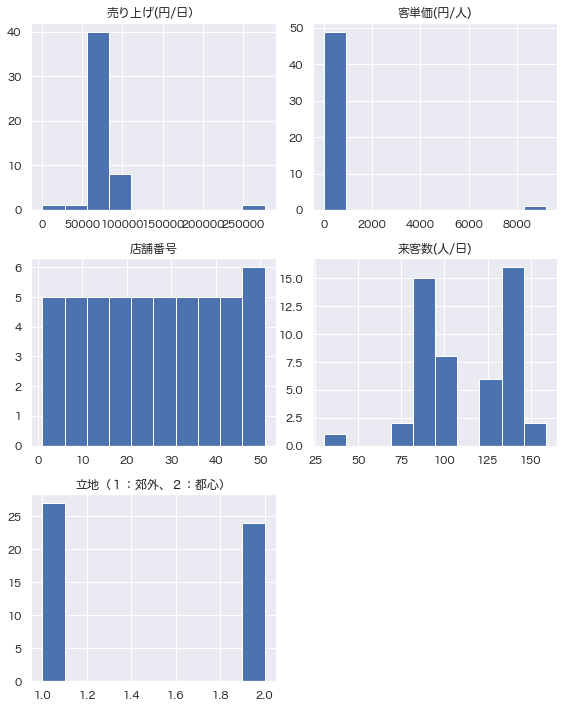

In [22]:
# グラフのサイズの調整
rcParams['figure.figsize'] = 8, 10
humberger_df.hist()
# グラフ同士が重ならないように
plt.tight_layout()

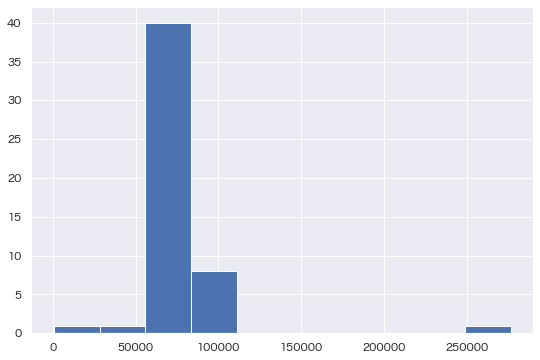

In [23]:
humberger_df['売り上げ(円/日）'].hist(bins=10, figsize=(9, 6))

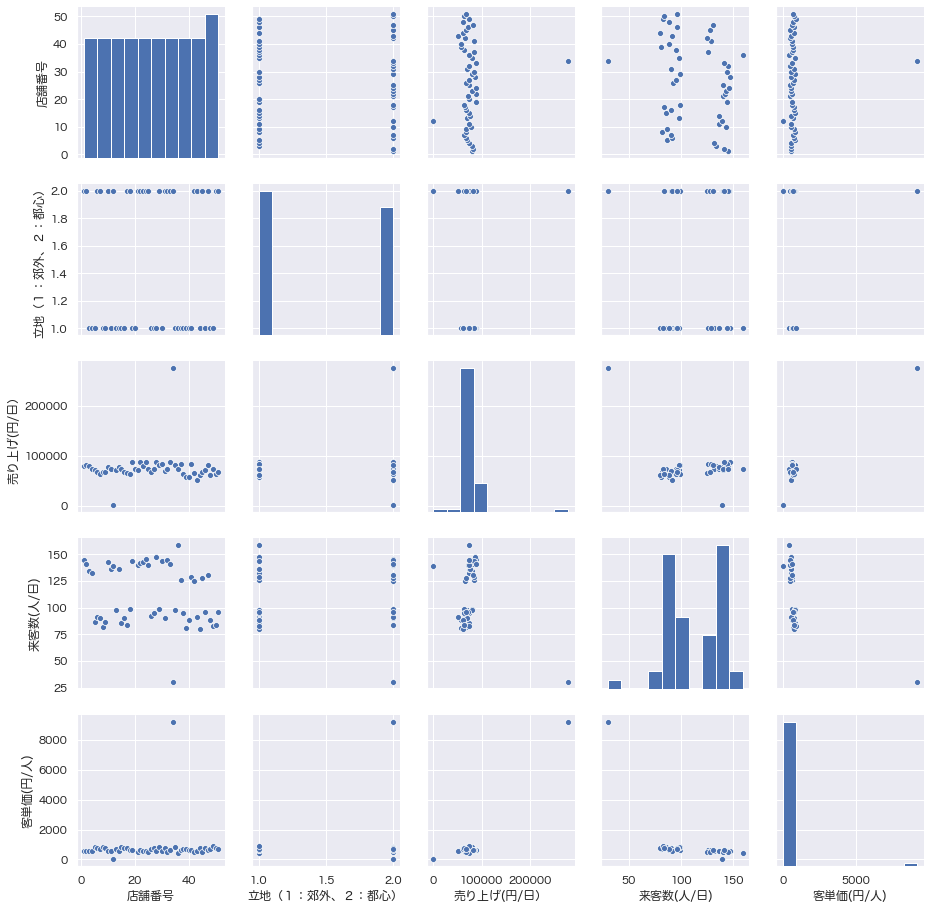

In [24]:
sns.pairplot(humberger_df, height=2.5);

### 2-5. データのクレンジング

- 売り上げの最大値と最小値
  - どちらも除外する
  
  
 - 客単価の最大値
   - 除外する

In [28]:
humberger_df

,店舗番号,店舗形態,立地（１：郊外、２：都心）,売り上げ(円/日）,来客数(人/日),客単価(円/人)
0,1,Ａ,2,80000.000000,145.0,551.724138
1,2,Ａ,2,82307.692308,141.0,583.742499
2,3,Ａ,1,79230.769231,134.0,591.274397
3,4,Ａ,1,73846.153846,132.0,559.440559
4,5,Ａ,1,70769.230769,87.0,813.439434
5,6,Ａ,2,68461.538462,91.0,752.324598
6,7,Ａ,2,64615.384615,90.0,717.948718
7,8,Ａ,1,68461.538462,82.0,834.896811
8,9,Ａ,1,67692.307692,87.0,778.072502
9,10,Ａ,2,78461.538462,143.0,548.682087
